# Exercise 1 #

Let $r_a$=5% be annually compounded interest rate. Calculate equivalent interest rate with monthly, daily and continuous compounding

## Solution exercise 1

In [2]:
#### INPUTS
r_a=0.05

#### Compute interest rate with monthly compounding

r_m<-((1+r_a)^(1/12)-1)*12  ###(1+r_a)=(1+r_m/12)^12


### Compute interest rate with daily compounding

r_d<-((1+r_a)^(1/365)-1)*365  ###(1+r_a)=(1+r_d/365)^365

### Compute interest rate with cont. compounding

r_c<- log(1+r_a)  ###(1+r_a)=exp(r_a)


### OUTPUT
r_m
r_d
r_c

[1] 0.04888949

[1] 0.04879343

[1] 0.04879016

# Exercise 2

We have a fixed-coupon bond with maturity T=10 years. The principal is P=1000 kr, the coupon is c=4%, payed annually. It means that $B_T=P(1+c)$ and $B_i=cP$ for $i<T$. The interest rate is r=4% annually compounded. Write a program which would calculate the value of the bond at time 0

## Solution Exercise 2

In [3]:
### INPUTS
maturity<-10
principal<-1000
coupon<-0.04
interest<-0.04

In [4]:
#define the cashflows
cashflow<-rep(coupon*principal,times=maturity)
cashflow[maturity]<-cashflow[maturity]+principal
cashflow <-cbind(1:maturity,cashflow)
    
cashflow

cashflow
 [1,]  1   40    
 [2,]  2   40    
 [3,]  3   40    
 [4,]  4   40    
 [5,]  5   40    
 [6,]  6   40    
 [7,]  7   40    
 [8,]  8   40    
 [9,]  9   40    
[10,] 10 1040

In [5]:
#discount the cashflows
discounted_cashflow<-cashflow
for (i in 1:maturity){
    discounted_cashflow[i,2]<-cashflow[i,2]/(1+interest)^cashflow[i,1]
}

discounted_cashflow

cashflow 
 [1,]  1  38.46154
 [2,]  2  36.98225
 [3,]  3  35.55985
 [4,]  4  34.19217
 [5,]  5  32.87708
 [6,]  6  31.61258
 [7,]  7  30.39671
 [8,]  8  29.22761
 [9,]  9  28.10347
[10,] 10 702.58674

In [6]:
#calculate value: OUTPUT
value<-sum(discounted_cashflow[,2])

value

[1] 1000

# Exercise 3

Rewrite the code in a form of a function. Investige value of the same bonds for different interest rates, from 0 to 10%

## Solution exercise 3

In [7]:
#define input
maturity<-10
principal<-1000
coupon<-0.04
interest<-1:10/100

In [8]:
#define
calculate_bond_value<-function(maturity,principal,coupon,interest){
    #define the cashflows
    cashflow<-rep(coupon*principal,times=maturity)
    cashflow[maturity]<-cashflow[maturity]+principal
    cashflow <-cbind(1:maturity,cashflow)
    
    #discount the cashflows
    discounted_cashflow<-cashflow
    for (i in 1:maturity){
        discounted_cashflow[i,2]<-cashflow[i,2]/(1+interest)^cashflow[i,1]
    }
    
    #calculate value: OUTPUT
    value<-sum(discounted_cashflow[,2])

    return(value)
}

In [9]:
### INPUT 

#define the matrix with the bond_values for different interest rates
values<-matrix(nrow=length(interest),ncol=2)

# calculate the bond value
for (i in 1:length(interest)){
    values[i,1]<-interest[i]
    values[i,2]<-calculate_bond_value(maturity,principal,coupon,interest[i])
}

###output
values

[,1] [,2]     
 [1,] 0.01 1284.1391
 [2,] 0.02 1179.6517
 [3,] 0.03 1085.3020
 [4,] 0.04 1000.0000
 [5,] 0.05  922.7827
 [6,] 0.06  852.7983
 [7,] 0.07  789.2926
 [8,] 0.08  731.5967
 [9,] 0.09  679.1171
[10,] 0.10  631.3260

# Exercise 4

Fixed the interest rate at $5$%. Calculate the prices of different bonds with the same maturity T=10, but different coupons from 0% to 10%

## Solution Exercise 4

In [10]:
#define input
maturity<-10
principal<-1000
coupon<-0:10/100
interest<-0.05



In [11]:
#define the matrix with the bond_values for different interest rates
values<-matrix(nrow=length(coupon),ncol=2)

for (i in 1:length(coupon)){
    values[i,1]<-coupon[i]
    values[i,2]<-calculate_bond_value(maturity,principal,coupon[i],interest)
}

###output
values

[,1] [,2]     
 [1,] 0.00  613.9133
 [2,] 0.01  691.1306
 [3,] 0.02  768.3480
 [4,] 0.03  845.5653
 [5,] 0.04  922.7827
 [6,] 0.05 1000.0000
 [7,] 0.06 1077.2173
 [8,] 0.07 1154.4347
 [9,] 0.08 1231.6520
[10,] 0.09 1308.8694
[11,] 0.10 1386.0867

# Exercise 5

Fixed the coupon at 5% and principal at 1000. Calculate the prices of different bonds with the same maturity T=10 and then T=20 first for interest 5% and then 6%. Which one is more sensitive to the increase in the interest rate?

## Solution Exercise 5

In [12]:
#### INPUT
T=10
r=0.05
coupon=0.05
principal=1000

#price bond T= 10 and r=5%
price<-calculate_bond_value(T,principal,coupon,r)

#### Output
price

[1] 1000

In [13]:
#### INPUT
T=10
r=0.06
coupon=0.05
principal=1000

#price bond T= 10 and r=6%
price<-calculate_bond_value(T,principal,coupon,r)

#### Output
price

[1] 926.3991

In [14]:
#### INPUT
T=20
r=0.05
coupon=0.05
principal=1000

#price bond T= 20 and r=5%
price<-calculate_bond_value(T,principal,coupon,r)

#### Output
price

[1] 1000

In [15]:
#### INPUT
T=20
r=0.06
coupon=0.05
principal=1000

#price bond T= 20 and r=6%
price<-calculate_bond_value(T,principal,coupon,r)

#### Output
price

[1] 885.3008

# Exercise 6

Let CF be a matrix with the first column to be the timing (in years) of the cashflow, and the second column the amount of the cashflow. Write a function which calculates the present value of the cashflow given the yearly compounded interest rate r.

## Solution Exercise 6

In [16]:
calculate_PV<-function(CF,interest){
    n=nrow(CF)

    #discount the cashflows
    discounted_cashflow<-CF
    for (i in 1:n){
        discounted_cashflow[i,2]<-CF[i,2]/(1+interest)^CF[i,1]
    }
    
    #calculate value: OUTPUT
    value<-sum(discounted_cashflow[,2])

    return(value)
}

# Exercise 7

Run the function from Ex.6 on the following two cashflows
CF_1=cbind(1:10,c(1000,800,600,300,100,50,25,20,10,5))
CF_2=cbind(1:15,c(500,600,700,800,1500,2500,2000,1500,1000,900,500,400,300,100,50))
with interest rate 5% and 6%
Which cashflow is more sensitive to the changes in the interest rate?

## Solution Exercise 7

In [17]:
### INPUT for CF_1
CF_1=cbind(1:10,c(1000,800,600,300,100,50,25,20,10,5))
r_1 <-0.05
r_2<-0.06

### Calculate PV for both interest rates
PV_1<-calculate_PV(CF_1, r_1)
PV_2<-calculate_PV(CF_1, r_2)

### Output
PV_1
PV_2
PV_2/PV_1

[1] 2599.601

[1] 2544.653

[1] 0.9788628

In [18]:
### INPUT for CF_2
CF_2=cbind(1:15,c(500,600,700,800,1500,2500,2000,1500,1000,900,500,400,300,100,50))
r_1 <-0.05
r_2<-0.06

### Calculate PV for both interest rates
PV_1<-calculate_PV(CF_2, r_1)
PV_2<-calculate_PV(CF_2, r_2)

### Output
PV_1
PV_2
PV_2/PV_1

[1] 9706.565

[1] 9144.006

[1] 0.9420434

# Exercise 8

Let CF be a matrix with the first column to be the timing (in years) of the cashflow, and the second column the amount of the cashflow. Write a function which calculates the duration the cashflows above given the yearly compounded interest rate r

## Solution Exercise 8

In [19]:
calculate_duration<-function(CF,interest){
    n=nrow(CF)

    #discount the cashflows
    discounted_cashflow<-CF
    for (i in 1:n){
        discounted_cashflow[i,2]<-CF[i,2]/(1+interest)^CF[i,1]
    }
    
    #calculate value: OUTPUT
    value<-sum(discounted_cashflow[,2]*discounted_cashflow[,1] )/sum(discounted_cashflow[,2])

    return(value)
}

# Excercise 9

Run the function from Ex. 8 on the two cashflows from Ex.6 with interest 5%. Then use the duration to approximate the change of Present Value of those cashflows with interest increasing to 6%

## Solution Exercise 9

In [20]:
## INPUT
CF_1=cbind(1:10,c(1000,800,600,300,100,50,25,20,10,5))
CF_2=cbind(1:15,c(500,600,700,800,1500,2500,2000,1500,1000,900,500,400,300,100,50))
r <-0.05
delta_r<-0.01

### Calulate durations
D_1 <-calculate_duration(CF=CF_1,interest=r)
D_2 <-calculate_duration(CF=CF_2,interest=r)

### Calculate approximate change in %

relative_change_PV_1<- -D_1/(1+r)*delta_r
relative_change_PV_2<- -D_2/(1+r)*delta_r

### Calculate approximate PV of cashflow
new_PV_1<-calculate_PV(CF_1, r)*(1+relative_change_PV_1)
new_PV_2<-calculate_PV(CF_2, r)*(1+relative_change_PV_2)

### Output
D_1
D_2

new_PV_1
new_PV_2

[1] 2.262955

[1] 6.336329

[1] 2543.574

[1] 9120.813

# Exercise 10

Let P be a matrix with the first column to be the maturity (in years) of the zero-coupon bond, and the second column the value of the zero coupon bond. Write a function which would compute the interest rate curve from those bonds.

 ## Solution Exercise 10

In [21]:
#define the function
calculate_interest_rate_curve<-function(P){
    #find the number of bonds
    n=nrow(P)
    
    #calculate the interest_rate
    interest_rate<-matrix(nrow=n,ncol=2)
    for (i in 1:n){
        interest_rate[i,1]<-P[i,1]
        interest_rate[i,2]<-(P[i,2])^(-1/P[i,1])-1
    }
    
    #output
    return(interest_rate)
}

# Exercise 11

Let P=cbind(1:10,c(0.99,0.978,0.97,0.966,0.96,0.955,0.951,0.947,0.944,0.94)). Plot the interest rate curve from those bonds

## Solution Exercise 11

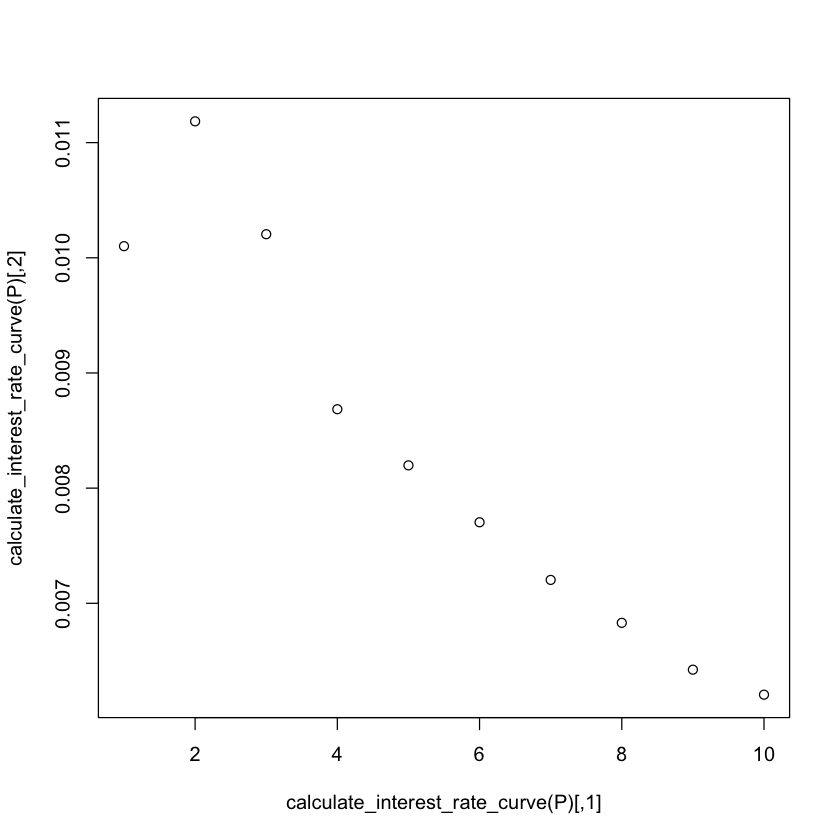

In [22]:
P=cbind(1:10,c(0.99,0.978,0.97,0.966,0.96,0.955,0.951,0.947,0.944,0.94))
plot(calculate_interest_rate_curve(P))

# Excercise 12

Imagine that you work at the investment centre of an insurance company in Norway. The interest rate is 5% compounded yearly. The reserving actuary has just provided you with the new estimate of the cashflows which constitute the reserves of the insurance company. This cashflows is

CF=cbind(1:15,c(500,600,700,800,1500,2500,2000,1500,1000,900,500,400,300,100,50))

You check which bonds available on the market and you find out that there are only 8 bonds available, all with principal 1:
1. maturity 1 year, coupon 0%
2. maturity 2 years, coupon 5%
3. maturity 3 years, coupon 4%
4. maturity 5 years, coupon 6%
5. maturity 7 years, coupon 5%
6. maturity 8 years, coupon 5%
7. maturity 10 years, coupon 4.5%
8. maturity 13 years, coupon 3%

Your task is
1. Calculate the present value of CF
2. Calculate the value of each bond
3. Calculate the duration of CF and each bond
4. Find a weights in the portfolio of the 8 bonds such that the value of the portfolio at time 0 is the same as the PV of the cashflows and the portfolio minimizes the loss of the own funds due to interest rate changes as approximated by the duration of assets and liabilities
5. Calculate the loss again for that balance sheet based on the interest rate 4% an 6%. How does it compare with the point 4?
6. Find a weights in the portfolio of the 8 bonds such that the value of the portfolio at time 0 is the same as the PV of the cashflows and the portfolio minimizes the sum og squared loss of the own funds due to interest rate changes calculated via discounting with r=4% and r=6%.
7. Calculate the loss again for that balance sheet based on the interest rate 4% an 6%. 
8. Compare the cashflows from the bonds in the portfolio from poiny 6 with the cashflows on the liability side. 
 

## Solution Exercise 12.1

In [23]:
#### Point 1
#### Define inputs
CF=cbind(1:15,c(500,600,700,800,1500,2500,2000,1500,1000,900,500,400,300,100,50))
r=0.05

#### Calculate PV
PV<-calculate_PV(CF,r)

###output
PV

[1] 9706.565

## Solution Exercise 12.2

In [24]:
#### Point 2
#### Define inputs
bonds<-cbind(c(1,2,3,5,7,8,10,13),c(0,0.05,0.04,0.06,0.05,0.05,0.045,0.03))

### calculate the value
values<-vector(length=nrow(bonds))
for (i in 1:length(values)){
    values[i]<-calculate_bond_value(maturity=bonds[i,1],principal=1,coupon=bonds[i,2],interest=r)
}

#### output
values

[1] 0.9523810 1.0000000 0.9727675 1.0432948 1.0000000 1.0000000 0.9613913
[8] 0.8121285

## Solution Exercise 11.3

In [25]:
#### Point 3
### Define inputs

### calculate the value of CF
duration_CF<-calculate_duration(CF,r)

### define a function which generates the cashflows of a fixed-coupon bond
generate_CF_of_bond<-function(principal, coupon,maturity){
    #define the cashflows
    cashflow<-rep(coupon*principal,times=maturity)
    cashflow[maturity]<-cashflow[maturity]+principal
    cashflow <-cbind(1:maturity,cashflow)
    
    return(cashflow)
}

### calculate duration for each bond
duration_bonds<-vector(length=nrow(bonds))

for (i in 1:length(duration_bonds)){
    duration_bonds[i]<-calculate_duration(CF=generate_CF_of_bond(principal=1,
                                                                 coupon=bonds[i,2],
                                                                 maturity=bonds[i,1]),
                                          interest=r)
}

### output
duration_CF
duration_bonds

[1] 6.336329

[1]  1.000000  1.952381  2.884380  4.477751  6.075692  6.786373  8.228650
[8] 10.682572

## Solution Exercise 12.4

In [26]:
#### Point 4
### Define input

### We prove first that the duration of a portfolio with weights is equal to
### weighted average duration of the bonds in the portfolio

### define a "loss function"

loss_function<-function(weights){
     loss<-(sum(duration_bonds*weights)*PV-duration_CF*PV)^2
    
    return(loss)
}

library(nloptr) #load optimization library nloptr. You may need to install it first. 
                #This optimizer works much better than the standard solver optim included in R though it's much
                #more complicated to define the problem

#define constraint for optimization
constraint_equality<-function(weights){
    constraint<- sum(weights)-1 #we want our weights to add up to 1
    
    return(constraint)
}

#define some parameters of the optimization (you don't need to understand it)

local_opts<-list("algorithm"="NLOPT_LD_MMA",
                "xtol_rel"=1.0e-5)
opts<-list("algorithm"="NLOPT_GN_ISRES",
            "xtol_rel"=1.0e-5,
            "maxeval"=1000000,
            "local_opts" = local_opts,
            "print_level" = 0)

##optimize
results<-nloptr(x0=rep(1/8,times=8),#define starting point for weights
               eval_f=loss_function, #function to optimize
               lb=rep(0,times=8),#lower bound on weights
               ub=rep(1,times=8),#upper bound on weights
               eval_g_eq=constraint_equality,#constraint i.e. that weights sum up to 1
               opts=opts)


#### oputput
results

optimal_weights<-results$solution

optimal_weights

loss_function(optimal_weights)



Call:
nloptr(x0 = rep(1/8, times = 8), eval_f = loss_function, lb = rep(0, 
    times = 8), ub = rep(1, times = 8), eval_g_eq = constraint_equality, 
    opts = opts)


Minimization using NLopt version 2.4.2 

NLopt solver status: 4 ( NLOPT_XTOL_REACHED: Optimization stopped because 
xtol_rel or xtol_abs (above) was reached. )

Number of Iterations....: 123941 
Termination conditions:  xtol_rel: 1e-05	maxeval: 1e+06 
Number of inequality constraints:  0 
Number of equality constraints:    1 
Optimal value of objective function:  7.45022487721463e-15 
Optimal value of controls: 0.07491563 0.02635757 0.1395912 0.005039289 0.2162567 0.2182524 0.1729112 
0.146676



[1] 0.074915629 0.026357573 0.139591201 0.005039289 0.216256712 0.218252362
[7] 0.172911245 0.146675984

[1] 7.450225e-15

## Solution Exercise 12.5

In [27]:
### Point 5
#### Define input
r_up=0.06
r_down=0.04

###Calculate the PV of the cashflows
PV_up<-calculate_PV(CF,r_up)
PV_down<-calculate_PV(CF,r_down)

### Calculate the value of the bonds in the portfolio
values_up<-vector(length=nrow(bonds))
values_down<-vector(length=nrow(bonds))
for (i in 1:length(values)){
    values_up[i]<-calculate_bond_value(maturity=bonds[i,1],principal=1,coupon=bonds[i,2],interest=r_up)
    values_down[i]<-calculate_bond_value(maturity=bonds[i,1],principal=1,coupon=bonds[i,2],interest=r_down)
}

#### calculate loss
loss_up=sum(values_up*optimal_weights)*PV-PV_up
loss_down=sum(values_down*optimal_weights)*PV-PV_down

#### output r=6%
PV-PV_up
PV-sum(values_up*optimal_weights)*PV
loss_up
loss_up/PV

#### output r=4%
PV-PV_down
PV-sum(values_down*optimal_weights)*PV
loss_down
loss_down/PV

[1] 562.5593

[1] 930.428

[1] -367.8687

[1] -0.03789896

[1] -610.533

[1] -175.7319

[1] -434.8011

[1] -0.04479454

## Solution Exercise 11.6

In [28]:
### Point 6
#### Define input



#### define loss function
loss_function<-function(weights){
    loss=(sum(values_up*weights)*PV-PV_up-(PV-PV))^2+(sum(values_down*weights)*PV-PV_down-(PV-PV))^2
    
    return(loss)
}


##optimize
results<-nloptr(x0=rep(1/8,times=8),#define starting point for weights
               eval_f=loss_function, #function to optimize
               lb=rep(0,times=8),#lower bound on weights
               ub=rep(1,times=8),#upper bound on weights
               eval_g_eq=constraint_equality,#constraint i.e. that weights sum up to 1
               opts=opts)


#### output
results

optimal_weights<-results$solution

optimal_weights

loss_function(optimal_weights)


Call:
nloptr(x0 = rep(1/8, times = 8), eval_f = loss_function, lb = rep(0, 
    times = 8), ub = rep(1, times = 8), eval_g_eq = constraint_equality, 
    opts = opts)


Minimization using NLopt version 2.4.2 

NLopt solver status: 4 ( NLOPT_XTOL_REACHED: Optimization stopped because 
xtol_rel or xtol_abs (above) was reached. )

Number of Iterations....: 144307 
Termination conditions:  xtol_rel: 1e-05	maxeval: 1e+06 
Number of inequality constraints:  0 
Number of equality constraints:    1 
Optimal value of objective function:  7.61690143778659e-13 
Optimal value of controls: 0.000401196 0.002006143 0.003020069 0.2879838 0.2008701 0.2216738 0.2750367 
0.009008233



[1] 0.000401196 0.002006143 0.003020069 0.287983783 0.200870082 0.221673846
[7] 0.275036656 0.009008233

[1] 7.616901e-13

## Solution Exercise 11.7

In [29]:
### Point 7
#### Define input
r_up=0.06
r_down=0.04

###Calculate the PV of the cashflows
PV_up<-calculate_PV(CF,r_up)
PV_down<-calculate_PV(CF,r_down)

### Calculate the value of the bonds in the portfolio
values_up<-vector(length=nrow(bonds))
values_down<-vector(length=nrow(bonds))
for (i in 1:length(values)){
    values_up[i]<-calculate_bond_value(maturity=bonds[i,1],principal=1,coupon=bonds[i,2],interest=r_up)
    values_down[i]<-calculate_bond_value(maturity=bonds[i,1],principal=1,coupon=bonds[i,2],interest=r_down)
}

#### calculate loss
loss_up=sum(values_up*optimal_weights)*PV-PV_up
loss_down=sum(values_down*optimal_weights)*PV-PV_down

#### output r=6%
PV-PV_up
PV-sum(values_up*optimal_weights)*PV
loss_up
loss_up/PV

#### output r=4%
PV-PV_down
PV-sum(values_down*optimal_weights)*PV
loss_down
loss_down/PV

[1] 562.5593

[1] 562.5593

[1] -7.437702e-07

[1] -7.662548e-11

[1] -610.533

[1] -610.533

[1] 4.566136e-07

[1] 4.704173e-11

## Solution Exercise 11.8

In [30]:
#### Point 8
#### define input

### Create a vector of CF for bond portfolio
CF_portfolio <-rep(0,times=max(bonds[,1]))


for (j in 1:nrow(bonds)){
    #define the cashflows of the bond j
    maturity<-bonds[j,1]
    coupon<-bonds[j,2]
    cashflow_bond_j<-rep(coupon,times=maturity)
    cashflow_bond_j[maturity]<-cashflow_bond_j[maturity]+1
    for (i in 1:(maturity)){
        CF_portfolio[i]<-cashflow_bond_j[i]*optimal_weights[j]*PV+CF_portfolio[i]
    }
}

CF_portfolio<-cbind(1:max(bonds[,1]),CF_portfolio)

CF_portfolio
CF

CF_portfolio
 [1,]  1  501.59090  
 [2,]  2  517.16943  
 [3,]  3  526.03753  
 [4,]  4  495.55045  
 [5,]  5 3290.88387  
 [6,]  6  327.83044  
 [7,]  7 2277.58903  
 [8,]  8 2382.03420  
 [9,]  9  122.75793  
[10,] 10 2792.41922  
[11,] 11    2.62317  
[12,] 12    2.62317  
[13,] 13   90.06218

[,1] [,2]
 [1,]  1    500
 [2,]  2    600
 [3,]  3    700
 [4,]  4    800
 [5,]  5   1500
 [6,]  6   2500
 [7,]  7   2000
 [8,]  8   1500
 [9,]  9   1000
[10,] 10    900
[11,] 11    500
[12,] 12    400
[13,] 13    300
[14,] 14    100
[15,] 15     50